<a href="https://colab.research.google.com/github/naenumtou/dataScienceLab/blob/main/marketBasket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set auto reload
%reload_ext autoreload
%autoreload 2

In [2]:
# Install library
!pip install mlxtend --upgrade #Need to upgrade to version 0.19.0

In [3]:
# Import library
import warnings
import pandas as pd
import numpy as np
import mlxtend
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import fpgrowth, association_rules, apriori

# Config
%config InlineBackend.figure_format = 'retina' #Retina display
plt.style.use('seaborn-deep') #Plot style
warnings.filterwarnings('ignore') #Off warnings
pd.set_option('display.max_rows', 500)

In [4]:
# Import dataset
df = pd.read_csv(
    'https://raw.githubusercontent.com/naenumtou/dataScienceLab/main/datasets/Groceries_dataset.csv',
    dtype = {
        'Member_number': str
    },
    parse_dates = ['Date'],
    dayfirst = True
)

# Show table
df.head(5)

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


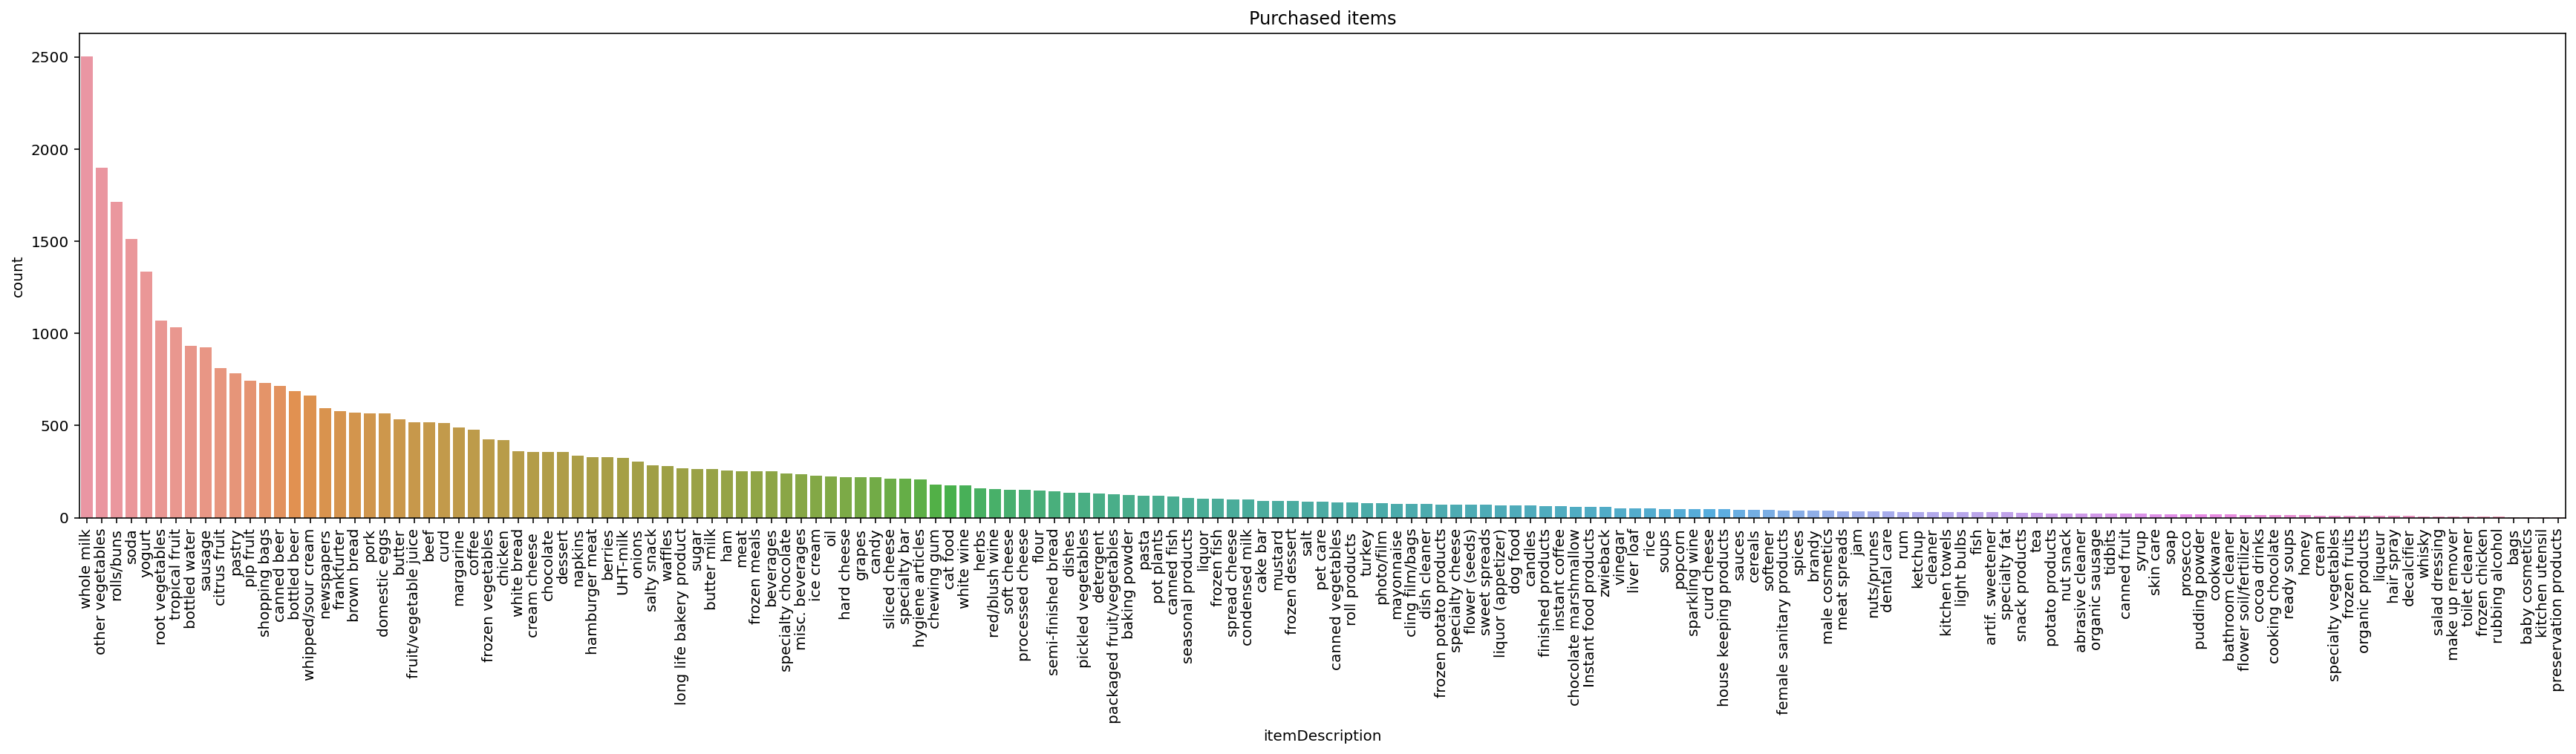

In [5]:
# Plot items
plt.figure(figsize = (30, 6))
sns.countplot(
    x = 'itemDescription',
    data = df,
    order = df['itemDescription'].value_counts().index
)
plt.title('Purchased items')
plt.xticks(rotation = 90)
plt.show()

In [6]:
# Sort by 'Member_number' and 'Date'
df = df.sort_values(
    by = ['Member_number', 'Date'],
    ignore_index = True
)

# Show table
df.head(5)

,Member_number,Date,itemDescription
0,1000,2014-06-24,whole milk
1,1000,2014-06-24,pastry
2,1000,2014-06-24,salty snack
3,1000,2015-03-15,sausage
4,1000,2015-03-15,whole milk


In [7]:
# Create daily transaction
df = pd.pivot_table(
    df,
    index = ['Member_number', 'Date'],
    values = 'itemDescription',
    aggfunc = lambda x: '|'.join(x)
).reset_index()

# Show table
df.head(5)

,Member_number,Date,itemDescription
0,1000,2014-06-24,whole milk|pastry|salty snack
1,1000,2015-03-15,sausage|whole milk|semi-finished bread|yogurt
2,1000,2015-05-27,soda|pickled vegetables
3,1000,2015-07-24,canned beer|misc. beverages
4,1000,2015-11-25,sausage|hygiene articles


In [8]:
# Basket data
dfBasket = df['itemDescription'].str.get_dummies('|')

# Show table
dfBasket.head(5)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Market Basket Analysis
A popular example of frequent itemset mining is Market Basket Analysis. This process identifies customer buying habits by finding associations between the different items that customers place in their **"shopping baskets"**

### Algorithms used
**FP Growth** is known as Frequent Pattern Growth Algorithm. FP growth algorithm is a concept of representing the data in the form of an FP tree or Frequent Pattern. Hence FP Growth is a method of **Mining Frequent Itemsets**.

### Example for calculation 1 item
\begin{align}
        \text{support(A)} = \frac{\text{Total purchased of A}}{\text{Total transaction}}
    \end{align}

```python
print(f"Support of whole milk: {dfBasket['whole milk'].sum() / len(dfBasket)}")
```
Result
```python
Support of whole milk: 0.1579
```
### Example for calculation 2 items
\begin{align}
        \text{support(A, B)} = \frac{\text{Total purchased of A and B}}{\text{Total transaction}}
    \end{align}

```python
print(f"Support of whole milk and other vegetables: {((dfBasket['whole milk'] == 1) & (dfBasket['other vegetables'] == 1)).sum() / len(dfBasket):.4f}")
```
Result
```python
Support of whole milk and other vegetables: 0.0148
```

In [9]:
# Create frequent of item
freqItems = fpgrowth(
    dfBasket,
    min_support = 0.01,
    use_colnames = True
).sort_values(
    'support',
    ascending = False
)

# Show table
freqItems

,support,itemsets
0,0.157923,(whole milk)
15,0.122101,(other vegetables)
9,0.110005,(rolls/buns)
5,0.097106,(soda)
3,0.085879,(yogurt)
23,0.069572,(root vegetables)
18,0.067767,(tropical fruit)
29,0.060683,(bottled water)
4,0.060349,(sausage)
42,0.053131,(citrus fruit)


## The confidence
The likelihood of buying one when another is bought.

### Example of confidence calculation to buy B when A is bought
\begin{align}
        \text{confidence(A -> B)} = \frac{\text{support(A, B)}}{\text{support(A)}}
    \end{align}

```python
round(
    (
        (
            (dfBasket['whole milk'] == 1) & (dfBasket['other vegetables'] == 1)
        ).sum() / \
        len(dfBasket)
    ) / \
    (
        dfBasket['whole milk'].sum() / len(dfBasket)
    ),
    4
)
```
Result
```python
0.0939
```

### Example of confidence calculation to buy A when B is bought
\begin{align}
        \text{confidence(B -> A)} = \frac{\text{support(A, B)}}{\text{support(B)}}
    \end{align}

```python
round(
    (
        (
            (dfBasket['whole milk'] == 1) & (dfBasket['other vegetables'] == 1)
        ).sum() / \
        len(dfBasket)
    ) / \
    (
        dfBasket['other vegetables'].sum() / len(dfBasket)
    ),
    4
)
```
Result
```python
0.1215
```

## The lift
The likelihood of buying **both of A and B** together more than **x times** that only bought B.
\begin{align}
        \text{lift(A -> B)} = \frac{\text{support(A, B)}}{\text{support(A) * support(B)}}
    \end{align}

```python
round(
    (
        (
            (dfBasket['whole milk'] == 1) & (dfBasket['other vegetables'] == 1)
        ).sum() / \
     len(dfBasket)
    ) / \
    (
        (dfBasket['whole milk'].sum() / len(dfBasket)) * \
        (dfBasket['other vegetables'].sum() / len(dfBasket))
    ),
    4
)
```
Result
```python
0.7694
```
Or it can be calculated as:
\begin{align}
        \text{lift(A -> B)} = \frac{\text{confidence(A -> B)}}{\text{support(B)}}
    \end{align}

```python
round(
    (
        (
        (
            (dfBasket['whole milk'] == 1) & (dfBasket['other vegetables'] == 1)
        ).sum() / \
        len(dfBasket)
    ) / \
    (
        dfBasket['whole milk'].sum() / len(dfBasket)
    )
    ) / \
    (
        dfBasket['other vegetables'].sum() / len(dfBasket)
    ),
    4
)
```
Result
```python
0.7694
```
It can be seen that the confidence A -> B is **NOT** equal to B -> A. However, the lift of A -> B is **EQUAL** to B -> A.

In [10]:
# Create association rules
rules = association_rules(
    freqItems,
    metric = 'lift',
    min_threshold = 0.05
).sort_values(
    'support',
    ascending = False
)

# Show table
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928
1,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551
2,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350
3,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550
4,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636
5,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663
6,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638
7,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861
8,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249
9,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117


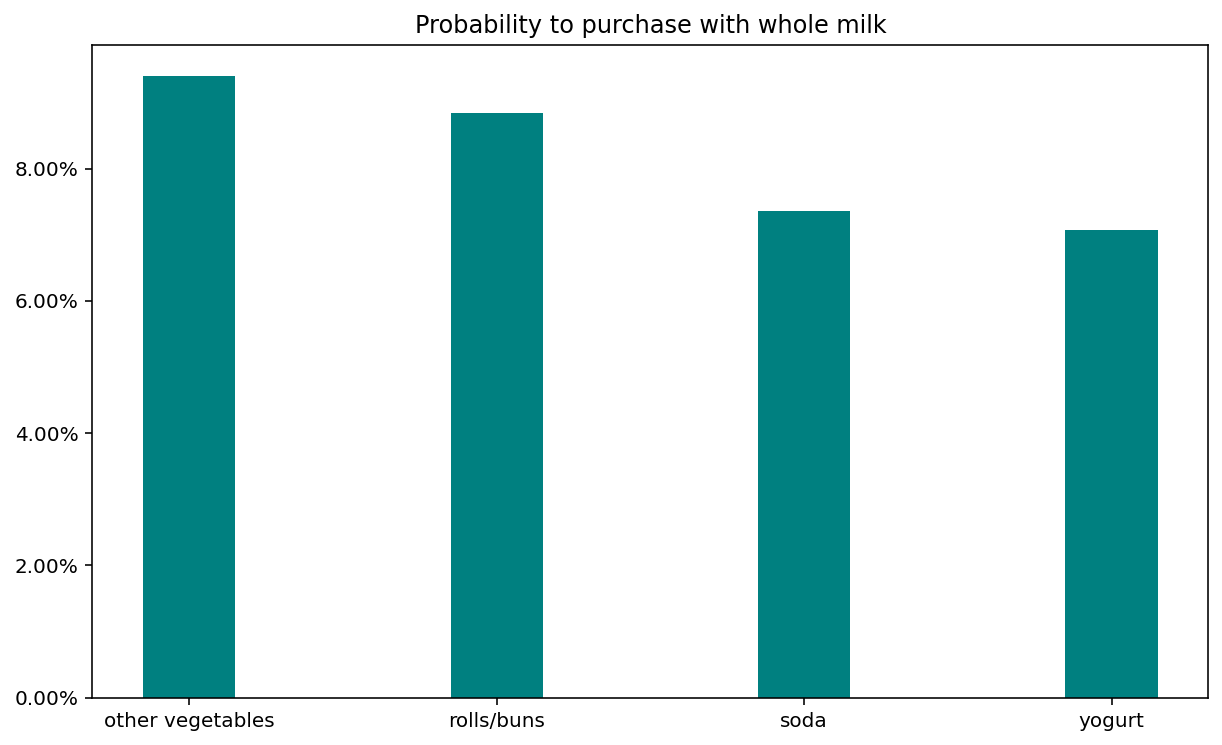

In [11]:
# Data for plot
dfPlot = rules[rules['antecedents'] == {'whole milk'}]

# Plot confidence
plt.figure(figsize = (10, 6))
plt.bar(
    np.arange(dfPlot.shape[0]),
    dfPlot['confidence'],
    0.3,
    color = 'teal',
)
plt.title('Probability to purchase with whole milk')
plt.gca().set_yticklabels([f'{y * 100:.2f}%' for y in plt.gca().get_yticks()])
plt.xticks(
    np.arange(dfPlot.shape[0]),
    [list(x)[0] for x in dfPlot['consequents']]
)
plt.show()

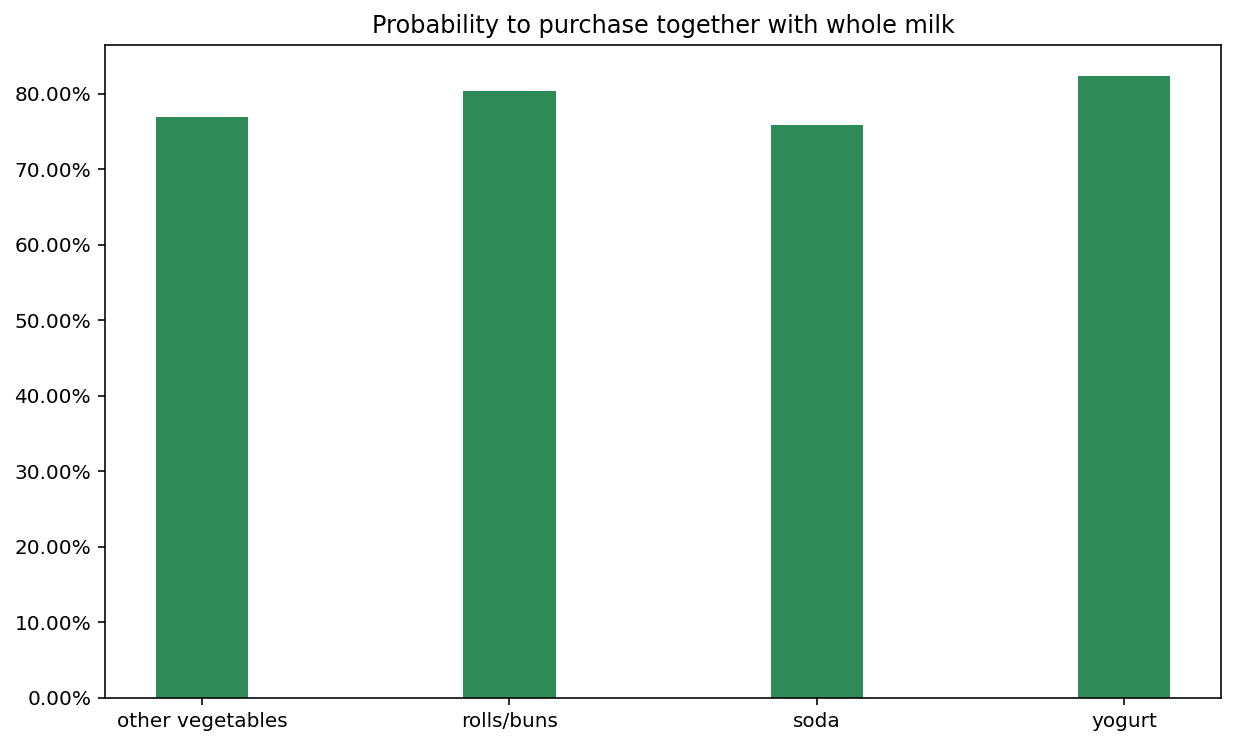

In [12]:
# Plot lift
plt.figure(figsize = (10, 6))
plt.bar(
    np.arange(dfPlot.shape[0]),
    dfPlot['lift'],
    0.3,
    color = 'seagreen',
)
plt.title('Probability to purchase together with whole milk')
plt.gca().set_yticklabels([f'{y * 100:.2f}%' for y in plt.gca().get_yticks()])
plt.xticks(
    np.arange(dfPlot.shape[0]),
    [list(x)[0] for x in dfPlot['consequents']]
)
plt.show()